In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from scipy.fftpack import fft, fftfreq, fftshift

## Filtro Bilateral

Dado um filtro:

* w(i, j, k, l) = exp(-$\frac {(i-k)² - (j-l)²}{2\sigma²d}$ - ($\frac{(I(i, j) - I(k, l))²}{2\sigma²r}))**2$

    * (i, j) são os indices dos pixeis a ser suavizados
    * (k, l) são os indices dos pixeis mais proximos de (i, j)
    * I(i, j) é o valor de diferença entre os pixeis (i, j)
    * $\sigma d$ é a diferença da distancia entre os pixeis
    * $\sigma r$ é a diferença da intensidade entre os pixeis
    
O novo valor do pixel é calculado por: 

* Ĩ(i, j) = $\frac{\sum_{k, l}^{1} (w(i, j, k, l) * I(k, l))}{(\sum{k, l} (w(i, j, k, l)))}$

In [2]:
def bilateral_filter(img, filter_size, sigmaD, sigmaR):

    radius = filter_size//2
    
    img_pad = np.pad(img, radius, mode='edge')
    
    dist_weigths = np.zeros((filter_size, filter_size))
    
    for row in range(filter_size):
        for col in range(filter_size):
            dist = (row-radius)**2+(col-radius)**2
            dist_weigths[row, col] = np.exp(-dist/(2*sigmaD**2))
            
    img_smoothed = np.zeros(img.shape)
    for row in range(radius, radius + img.shape[0]):
        for col in range(radius, radius + img.shape[1]):
            sub_img = img_pad[row-radius:row+radius+1,
                              col-radius:col+radius+1]
            img_diff = sub_img - img_pad[row, col]
            gauss_int = np.exp(-img_diff**2/(2*sigmaR**2))
            weigth = dist_weigths*gauss_int
            sum_weights = np.sum(weigth)
            img_smoothed[row-radius, col-radius] = np.sum(weigth*sub_img)/sum_weights
    
    return img_smoothed

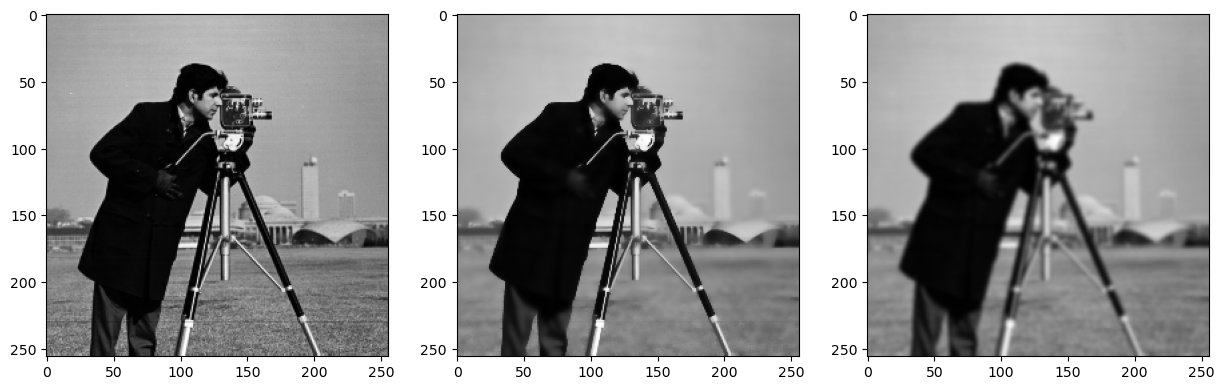

In [3]:
img = plt.imread("../cameraman.tiff")
img_smoothed = bilateral_filter(img.astype(float), 7, 2, 50)

img_smoothed_gaus = ndi.gaussian_filter(img, 1.5)

plt.figure(figsize = (15, 15))
plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.subplot(1,3,2)
plt.imshow(img_smoothed, 'gray')
plt.subplot(1,3,3)
plt.imshow(img_smoothed_gaus, 'gray')

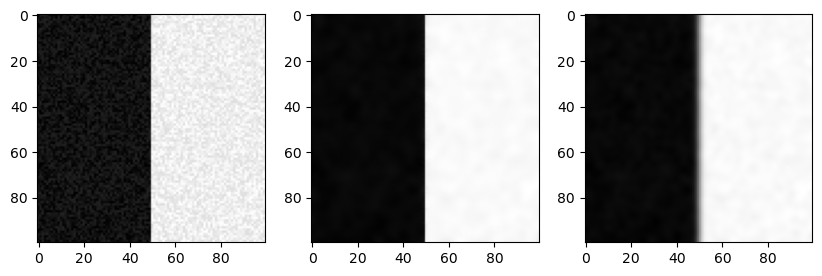

In [4]:
img2 = np.zeros((100, 100))
img2[:, 50:] = 255
img2 += 40*np.random.rand(100, 100)

img2_smooth_gaus = ndi.gaussian_filter(img2, 1.5)

img2_smooth = bilateral_filter(img2, 7, 2, 100)

plt.figure(figsize = (10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img2, 'gray')
plt.subplot(1, 3, 2)
plt.imshow(img2_smooth, 'gray')
plt.subplot(1, 3, 3)
plt.imshow(img2_smooth_gaus, 'gray')

## Processamento no dominio da frequencia
### Separabilidade da trasnformada de Fourier

* F(u, v) = $\int_{-\infty}^{\infty} \; F(u,y)* e^{-2\pi ivy}$*dy

A trasnformada de Fourier tem a complexidade de:

* 1D: O(nlog(n))
* 2D: O(n²log(n))
* 3D: O(n³log(n))

## Filtro de Gabor

Este filtro analisa diferentes intervalos para encontrar novos padroes de frequencias espaciais, assim, considerando uma função seno que começa com uma frequencia leve e vai se intensificando, assim, ele nota o novo padrão e se adapta a tal novo padrão. Assim, em imagens por exemplo, uma transformada de fourier faria a equação para toda a imagem, enquanto usando o filtro de Gabor, ele  vera diferentes valores de intensidade para tais pixeis e fara a filtragem com base nos pixeis que ele esta analisando

- Filtros com localização espacial e de frequencia

* G(x, $\mu$, $\sigma$) = $e^{-\frac{x²}{w\sigma²}}$ * $e^{2\pi i x \mu}$
    * sendo $\sigma$ a largura do envelope
    
    * u frequencia central.
    
    (a primeira parte da exponencial é chamada de envelope e a segunda o termo da frequencia)
    
No dominio da frequência:

* G(f, $\mu, \sigma$) = $\exp^{- \frac{\sigma² [2\pi (f-\mu)]²}{2}}$

    * f: variavel do dominio da frequenciia

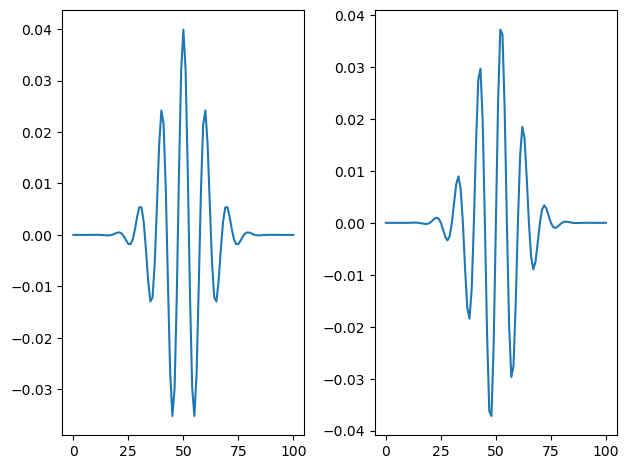

In [13]:
def gabor_1d(N, sigma_env, main_frequency):
    """
    N: tamanho do filtro
    sigma_env: largura do envelope
    main_frequency: frequencia central do filtro
    """
    N2 = N//2
    x = np.arange(-N2, N2+1)
    envelop = np.exp(-x**2/(2*sigma_env**2))/(np.sqrt(2*np.pi)*sigma_env)
    wave = np.exp(2*np.pi*1j*x*main_frequency)
    g_gabor = envelop*wave
    
    return g_gabor


N = 100
sigma_env = 10
main_frequency = 0.1
g_gabor = gabor_1d(N, sigma_env, main_frequency)

plt.figure()
plt.subplot(121)
plt.plot(np.real(g_gabor))
plt.subplot(122)
plt.plot(np.imag(g_gabor))
plt.tight_layout()

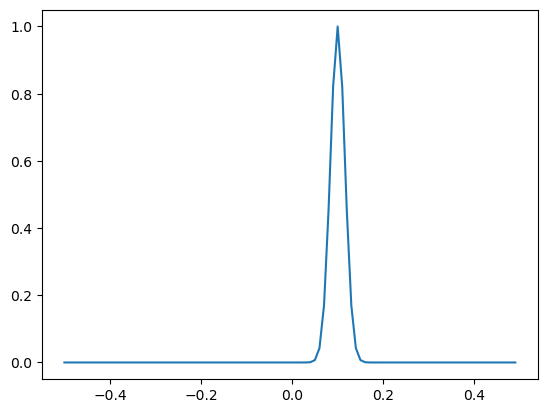

In [17]:
def fourier_gabor_teo(N, sigma_env, main_free):
    """
    
    """
    
    freqs = fftshift(fftfreq(N, 1))
    fourier_gabor = np.exp(-sigma_env**2* (2 * np.pi * (freqs - main_free) ) **2 /2)
    
    return freqs, fourier_gabor

freqs, fourier_gabor = fourier_gabor_teo(N, sigma_env, main_frequency)
plt.plot(freqs, fourier_gabor)

### Para 2D:

Vai ter um notebook no AVA